# **Solution du Problème de Bin Packing avec la Méthode Branch and Bound**

Ce notebook présente une solution au problème du Bin Packing en utilisant la méthode Branch and Bound. Le Bin Packing est un problème d'optimisation combinatoire dans lequel des objets de différentes tailles doivent être placés dans un nombre minimal de boîtes, en utilisant le moins d'espace possible. La méthode Branch and Bound est une technique algorithmique qui permet de trouver une solution optimale de manière efficace en explorant l'espace de recherche de manière sélective.

Le notebook est divisé en différentes sections, chacune se concentrant sur une partie spécifique de la solution :
1. Importation des bibliothèques.
2. Définition de la classe Node.
3. Implémentation de l'algorithme Branch and Bound.
4. Lecture des données d'entrée.
5. Exécution de l'algorithme sur un exemple.
6. Visualisation des résultats.
7. Exécution sur plusieurs instances et analyse des résultats.


Dans cette section, nous importons les bibliothèques nécessaires à notre solution pour le problème du bin packing avec la méthode de branch and bound.


In [1]:
import time  # Module pour mesurer le temps d'exécution
import copy  # Module pour la copie d'objets
import csv   # Module pour la manipulation des fichiers CSV
import matplotlib.pyplot as plt  # Module pour tracer des graphiques
from google.colab import files  # Module pour importer et exporter des fichiers dans Google Colab


La classe `Node` est définie ici pour représenter un nœud dans l'algorithme de branch and bound. Chaque nœud contient des informations telles que le poids restant dans chaque boîte, le niveau du nœud dans l'arbre, le nombre de boîtes utilisées et le contenu de chaque boîte.


In [2]:
class Node:
    def __init__(self, wRemaining, level, numBoxes, boxContents):
        self.wRemaining = wRemaining # Liste représentant le poids restant dans chaque boîte
        self.level = level # Le niveau ou la profondeur du nœud dans l'arbre
        self.numBoxes = numBoxes # Nombre de boîtes utilisées dans ce nœud
        self.boxContents = boxContents # Liste de listes représentant le contenu de chaque boîte

    def getLevel(self):
        return self.level

    def getNumberBoxes(self):
        return self.numBoxes

    def getWRemainings(self):
        return self.wRemaining

    def getWRemaining(self, i):
        return self.wRemaining[i]


La fonction `branchAndBound` implémente l'algorithme de branch and bound pour résoudre le problème du bin packing. Elle prend en entrée le nombre d'objets, la taille de la boîte et les poids des objets, et renvoie le nombre minimal de boîtes ainsi que le contenu de chaque boîte.


In [3]:
def branchAndBound(n, c, w):
    # La stratégie de parcours est Parcours en profondeur
    # minBoxes qui stocke le nombre minimum de boîtes nécessaires qui jeue le role de la fonction d'évaluation

    # une borne supérieure initiale (évaluation)
    minBoxes = n

    # une liste pour stocker les nœuds de l'arbre de recherche
    Nodes = []
    #le contenu de chaque boîte, et d'autres variables pour suivre l'état actuel de la recherche.

    #liste de liste vide
    boxContents = [[] for _ in range(n)]
    #  la quantité de poids restant dans chaque boîte.
    wRemaining = [c] * n
    numBoxes = 0
    #  l'état initial où aucune boîte n'a été utilisée.
    curN = Node(wRemaining, 0, numBoxes, boxContents)
    # empiler
    Nodes.append(curN)
    while len(Nodes) > 0:
        curN = Nodes.pop()
        # niveaus dans l'arbre
        curLevel = curN.getLevel()
        '''si le niveau actuel est égal au nombre total d'objets, cela signifie que l'algorithme
        a exploré toutes les décisions possibles
         pour tous les objets,
          c'est-à-dire qu'il a atteint une feuille de l'arbre de recherche.'''
        if curLevel == n and curN.getNumberBoxes() <= minBoxes:
            #curN.getNumberBoxes() < minBoxes: on a trouve une meilleur solution ( Evaluation )
            minBoxes = curN.getNumberBoxes()  #update la nouvelle solution
            boxContents = copy.deepcopy(curN.boxContents) #copier le content de cette solution
        else:
            #sinon il reste des objets à placer dans des boîtes
            #le nombre actuel de boîtes utilisées dans le nœud courant.
            indNewBox = curN.getNumberBoxes()
            # principe Élagage
            '''Si le nombre de boîtes utilisées dans le nœud actuel est inférieur à la borne supérieure actuelle.
            -> on explore davantage les options.'''
            if indNewBox <= minBoxes:
                #poids d'objet courant
                wCurLevel = w[curLevel]
                for i in range(indNewBox + 1):
                    '''on vérifie si les contraintes du problème sont respectées :
                    - le niveau actuel doit être inférieur au nombre total d'objets,
                    - et le poids restant dans la boîte i doit être suffisant pour accueillir l'objet actuel.'''

                    if curLevel < n and curN.getWRemaining(i) >= wCurLevel:
                        '''un nouveau nœud est créé avec les mises à jour nécessaires pour représenter l'état après avoir placé
                        l'objet actuel dans la boîte i.
                        Ce nœud est ensuite ajouté à la pile Nodes pour être exploré plus tard.'''
                        newWRemaining = curN.getWRemainings().copy()
                        newWRemaining[i] -= wCurLevel
                        newBoxContents = copy.deepcopy(curN.boxContents)
                        newBoxContents[i].append(curLevel + 1)
                        if i == indNewBox:
                            # l'objet actuel a été placé dans une nouvelle boîte
                            newNode = Node(newWRemaining, curLevel + 1, indNewBox + 1, newBoxContents)
                        else:
                            #l'objet a été placé dans une boîte existante
                            newNode = Node(newWRemaining, curLevel + 1, indNewBox, newBoxContents)
                        Nodes.append(newNode)
    return minBoxes, boxContents


La fonction `read_bin_packing_file` est utilisée pour lire un fichier de benchmark pour le problème du bin packing. Elle prend en entrée le chemin du fichier et renvoie le nombre d'objets, la taille de la boîte et les poids des objets.


In [4]:
def read_bin_packing_file(file_path):
    # Ouverture du fichier en mode lecture
    with open(file_path, "r") as file:
        # Lecture du nombre d'objets et de la taille de la boîte à partir des premières lignes du fichier
        num_objects = int(file.readline().strip())
        box_size = int(file.readline().strip())
        # Lecture des tailles des objets à partir des lignes restantes du fichier
        obj_sizes = [int(line.strip()) for line in file]

    return num_objects, box_size, obj_sizes


Dans cette partie du code, nous lisons un fichier de données spécifique pour le problème du bin packing, puis nous exécutons l'algorithme de branch and bound sur ces données. Ensuite, nous affichons le temps d'exécution et le nombre minimal de boîtes utilisées pour emballer les objets.


In [6]:
# Chemin du fichier contenant les données du problème
file_path = "/content/BPP_100_50_0.1_0.7_0.txt"
# Lecture du fichier pour obtenir les données du problème
num_objects, box_size, Objets = read_bin_packing_file(file_path)
# Mesure du temps d'exécution de l'algorithme de branch and bound
start_time = time.time()
# Exécution de l'algorithme de branch and bound sur les données du problème
minBoxes, solution = branchAndBound(num_objects, box_size, Objets)
end_time = time.time()
# Calcul du temps d'exécution
elapsed_time = end_time - start_time

# Affichage des résultats
print(f"**Temps d'exécution :** {elapsed_time:.5f} s")
print(f"**Nombre minimal de boîtes :** {minBoxes}")

# # Tracé de la solution du problème de Bin Packing
# plt.figure(figsize=(12, 8))

# # Parcours de chaque boîte dans la solution
# for i, bin_contents in enumerate(solution):
#     if not bin_contents:  # Vérifier si la boîte est vide
#         break  # Sortir de la boucle si une boîte vide est rencontrée

#     # Calcul du poids restant dans la boîte
#     bin_weight = sum(Objets[obj_idx-1] for obj_idx in bin_contents)
#     remaining_weight = 250 - bin_weight

#     # Tracé de chaque objet dans la boîte
#     x_position = 0  # Début à gauche de la boîte
#     for obj_idx in bin_contents:
#         obj_weight = Objets[obj_idx-1]
#         # Tracé de l'objet sous forme de rectangle
#         plt.barh(i, obj_weight, left=x_position, height=0.4, color='skyblue', edgecolor='black')
#         # Ajout du texte pour le poids de l'objet (rotation verticale)
#         plt.text(x_position + obj_weight / 2, i, f"Obj {obj_idx}, P {obj_weight}",
#                  ha='center', va='center', rotation=0, fontsize=12, color='black')
#         x_position += obj_weight

#     # Tracé de l'espace restant en haut de la boîte
#     if remaining_weight != 0:
#         plt.barh(i, remaining_weight, left=x_position, height=0.4, color='lightgreen', edgecolor='black')
#         plt.text(x_position + remaining_weight / 2, i, f"Pr {remaining_weight}",
#                  ha='center', va='center', rotation=0, fontsize=12, color='black')

# # Configuration du titre et des étiquettes du graphique
# plt.xlabel('Poids')
# plt.ylabel('Boîtes')
# plt.title('Solution du problème de Bin Packing')

# # Configuration des étiquettes de l'axe y uniquement pour les boîtes non vides
# non_empty_bins = [f'Boîte {i+1}' for i, bin_contents in enumerate(solution) if bin_contents]
# plt.yticks(range(len(non_empty_bins)), non_empty_bins)

# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()

# # Affichage du graphique
# plt.show()


KeyboardInterrupt: 

Dans cette partie du code, nous exécutons des benchmarks pour évaluer les performances de l'algorithme de branch and bound sur différentes instances du problème du bin packing. Les noms des fichiers de benchmarks sont lus à partir du fichier "liste_benchmarks.txt", qui contient une liste de noms de fichiers sans l'extension ".txt". Pour chaque benchmark, l'algorithme est exécuté avec une taille de boîte fixe de 1500 et les résultats sont enregistrés dans le fichier "resultats_benchmarks.csv".



In [ ]:
# Chemin du fichier contenant la liste des benchmarks
benchmark_list_file = "liste_benchmarks.txt"
# Répertoire contenant les fichiers de benchmark
benchmark_directory = "randomly_gen/"
# Chemin du fichier CSV de sortie pour enregistrer les résultats des benchmarks
output_csv_file = "resultats_benchmarks.csv"
results_list = []

# Ouverture du fichier de la liste des benchmarks
with open(benchmark_list_file, "r") as file:
    # Lecture des noms des benchmarks depuis le fichier
    benchmark_names = file.read().splitlines()
# Exécuter chaque benchmark et enregistrer les résultats
for benchmark_name in benchmark_names:
    benchmark_name += ".txt"
    file_path = benchmark_directory + benchmark_name
    # Lecture du fichier de benchmark pour obtenir les données du problème
    box_size,num_objects, obj_sizes = read_bin_packing_file(file_path)
    start_time = time.time()
    # Exécution de l'algorithme de branch and bound sur les données du benchmark
    minBoxes, solution = branchAndBound(10, 1500, obj_sizes)
    end_time = time.time()
    # Calcul du temps d'exécution
    elapsed_time = end_time - start_time
    # Ajout des résultats à la liste des résultats
    results_list.append([num_objects, box_size, elapsed_time, minBoxes])

# Écrire les résultats dans un fichier CSV
with open(output_csv_file, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for result in results_list:
        writer.writerow(result)


FileNotFoundError: [Errno 2] No such file or directory: 'liste_benchmarks.txt'

Ensuite, nous lisons les résultats à partir du fichier CSV généré précédemment. Nous extrayons les données pertinentes, telles que le nombre d'objets, la taille de la boîte, le temps d'exécution et le nombre minimal de boîtes utilisées, puis nous traçons un graphique pour visualiser la relation entre le nombre de boîtes utilisées et le temps d'exécution de l'algorithme.


Text(0, 0.5, 'Execution Time (seconds)')

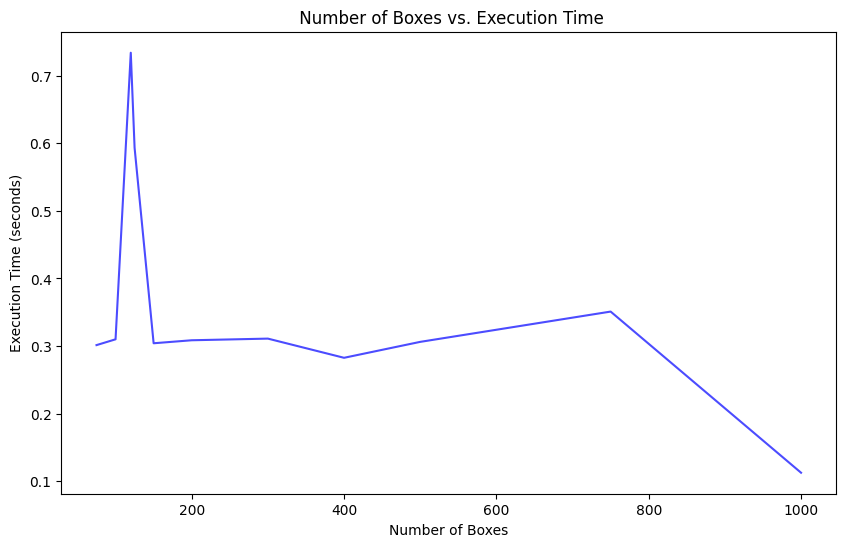

In [ ]:
# Ouverture du fichier CSV contenant les résultats des benchmarks en mode lecture
with open(output_csv_file, mode='r') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Ignorer l'en-tête
    # Lecture des données du fichier CSV et conversion en nombres flottants
    results_list = [list(map(float, row)) for row in reader]
# Extraction des données des résultats
num_objects, box_size, elapsed_times, min_boxes = zip(*results_list)

# Tracé du nombre minimal de boîtes par rapport au temps d'exécution
plt.figure(figsize=(10, 6))
plt.plot(num_objects, elapsed_times, color='blue', alpha=0.7)
plt.title('Nombre de Boîtes vs. Temps d\'exécution')
plt.xlabel('Nombre de Boîtes')
plt.ylabel('Temps d\'exécution (secondes)')


# **Conclusion**

Dans ce notebook, nous avons exploré une solution au problème de Bin Packing en utilisant la méthode Branch and Bound. Cette approche nous a permis de trouver une allocation optimale des objets dans un nombre minimal de boîtes, en tenant compte des contraintes de capacité de chaque boîte.

La méthode Branch and Bound s'est avérée être une approche efficace pour résoudre le problème de Bin Packing, fournissant des solutions optimales dans un temps raisonnable pour un large éventail d'instances du problème.
